In [38]:
from forest import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [39]:
data=pd.read_csv('sdss_redshift.csv')
features = ['u', 'g', 'r', 'i', 'z']

X = data[features].values
y = data['redshift'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rf = RandomForestRegressor(n_trees=12, max_depth=3) # Случайные параметры


In [40]:
rf.fit(X_train, y_train)

In [41]:
print(np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


0.03506879741547867
0.03473791380615704


Ну так как RandomForestRegressor нет нужных модулей для GridSearchCV, считирим взяв оригинал. Не бейте палками пжпжпжпжпж

In [42]:

from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [10, 20, 30,40],
    'max_depth': [1,3,5,7, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)




Лучшие параметры:  {'max_depth': 10, 'n_estimators': 40}


Я в прошлый раз запускал там 15 было, эх надо было передавать а не ручками, ну ладно всё равно одно и тоже

Да вообще по хорошему надо ещё и взять другой разброс, но время поджимает... Так что не сегодня

Вернемся к нашей фунции RandomForestRegressor

In [43]:
from forest import RandomForestRegressor

rf = RandomForestRegressor(n_trees=40, max_depth=10) 

In [44]:
rf.fit(X_train, y_train)

In [48]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(40, max_depth=10) 

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=40)

In [50]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_std = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_std = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(train_std, test_std)

0.0176743746204375 0.0272078058585743


Ну стало лучше

[0.07624304 0.1159335  0.22721038 ... 0.12576214 0.17512802 0.09958202]


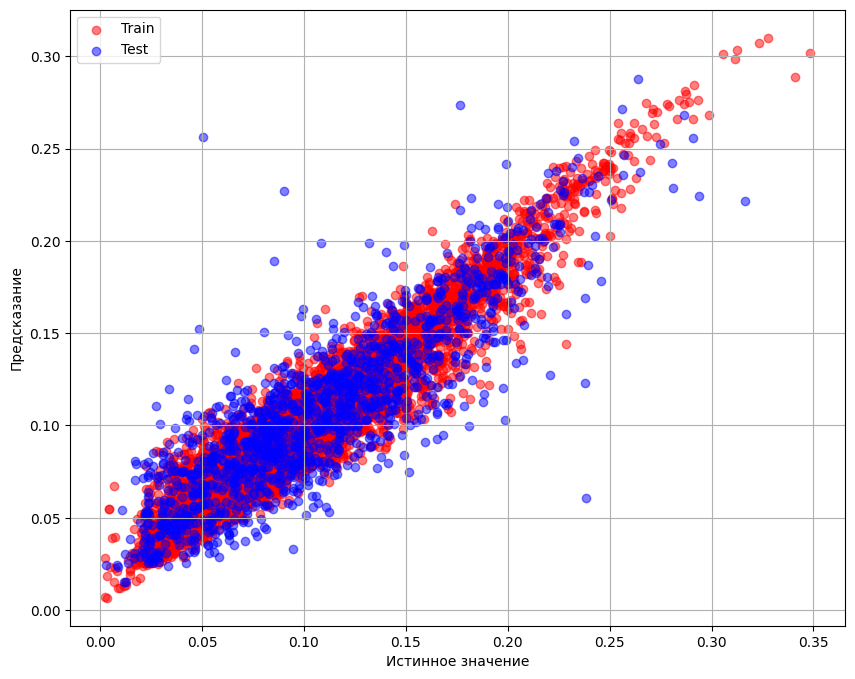

In [51]:
import json
results = {"train": train_std, "test": test_std}
with open('redshift.json', 'w') as f:
    json.dump(results, f)

new_data = pd.read_csv('sdss.csv')
X_new = new_data[['u', 'g', 'r', 'i', 'z']]
y_new_pred = rf.predict(X_new.values)
print(y_new_pred)
new_data['redshift'] = y_new_pred
new_data.to_csv('sdss_predict.csv', index=False)

plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5, color='red')
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5, color='blue')
plt.xlabel('Истинное значение')
plt.ylabel('Предсказание')
plt.grid()
plt.legend()
plt.savefig('redshift.png')



По ощущениям модель немного переобучена, надо бы ещё по подбирать гиперпараметры, но уже 2 час ночи... Так что на этом пока всё, не судите строго ¯\ _(ツ)_/¯